In [255]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(style="whitegrid")

In [256]:
df = pd.read_csv("tank.csv")
df.columns = df.columns.str.strip()


In [257]:
print(df.isnull().sum())

Season Number       0
Startup Name        0
Episode Number      0
Pitch Number        0
Season Start        0
                 ... 
Aman Present       78
Peyush Present    246
Ritesh Present    496
Amit Present      497
Guest Present     323
Length: 80, dtype: int64


In [258]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(0)

In [259]:
print(df.columns)

Index(['Season Number', 'Startup Name', 'Episode Number', 'Pitch Number',
       'Season Start', 'Season End', 'Original Air Date', 'Episode Title',
       'Anchor', 'Industry', 'Business Description', 'Company Website',
       'Started in', 'Number of Presenters', 'Male Presenters',
       'Female Presenters', 'Transgender Presenters', 'Couple Presenters',
       'Pitchers Average Age', 'Pitchers City', 'Pitchers State',
       'Yearly Revenue', 'Monthly Sales', 'Gross Margin', 'Net Margin',
       'EBITDA', 'Cash Burn', 'SKUs', 'Has Patents', 'Bootstrapped',
       'Part of Match off', 'Original Ask Amount', 'Original Offered Equity',
       'Valuation Requested', 'Received Offer', 'Accepted Offer',
       'Total Deal Amount', 'Total Deal Equity', 'Total Deal Debt',
       'Debt Interest', 'Deal Valuation', 'Number of Sharks in Deal',
       'Deal Has Conditions', 'Royalty Percentage', 'Royalty Recouped Amount',
       'Advisory Shares Equity', 'Namita Investment Amount',
       'Nam

In [260]:
numeric_cols = ['Total Deal Amount', 'Deal Valuation', 'Yearly Revenue', 'Monthly Sales','Gross Margin', 'Net Margin', 'EBITDA', 'Cash Burn']

In [261]:
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace("₹","", regex=False).str.replace(",","", regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

In [262]:
total_startups = len(df)
funded_startups = (df['Total Deal Amount'] > 0).sum()
avg_funding = df['Total Deal Amount'].mean()

In [263]:
print("======= Basic Statistics =======")
print(f"Total Startups: {total_startups}")
print(f"Funded Startups: {funded_startups}")
print(f"Average Funding (₹): {avg_funding:,.2f}\n")

======= Basic Statistics =======
Total Startups: 634
Funded Startups: 359
Average Funding (₹): 41.46



In [264]:
df['Funded'] = df['Total Deal Amount'] > 0

In [265]:
industry_funding = df.groupby('Industry')['Total Deal Amount'].sum().sort_values(ascending=False)

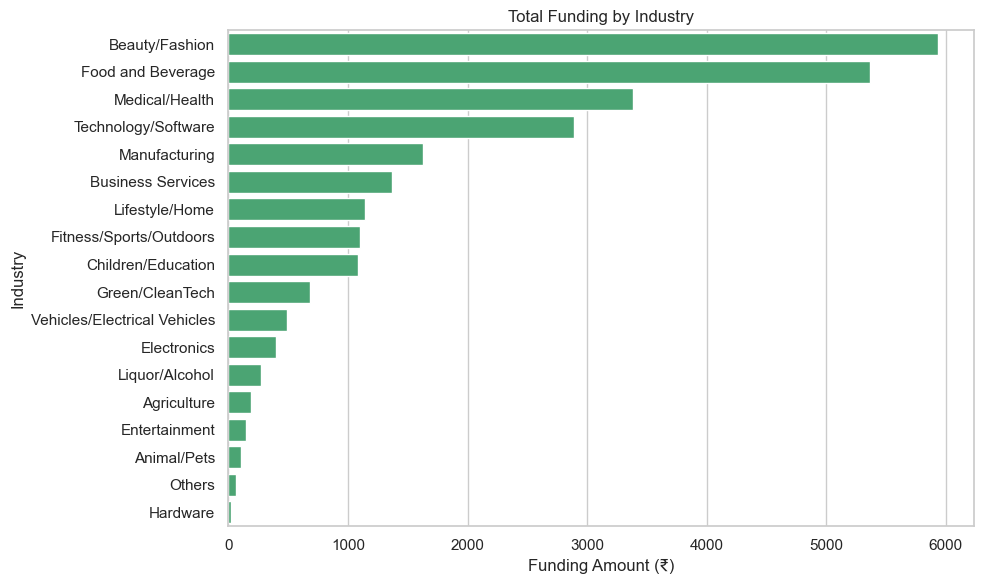

In [266]:
plt.figure(figsize=(10,6))
sns.barplot(x=industry_funding.values, y=industry_funding.index, color="mediumseagreen")
plt.title("Total Funding by Industry")
plt.xlabel("Funding Amount (₹)")
plt.ylabel("Industry")
plt.tight_layout()
plt.savefig("industry_funding.png")
plt.show()

In [267]:
sharks = [
    'Namita Investment Amount', 'Vineeta Investment Amount', 'Anupam Investment Amount',
    'Aman Investment Amount', 'Peyush Investment Amount', 'Ritesh Investment Amount',
    'Amit Investment Amount'
]

In [268]:
shark_totals = {}
for shark in sharks:
    if shark in df.columns:
        shark_totals[shark.replace(' Investment Amount','')] = df[shark].sum()

<Axes: >

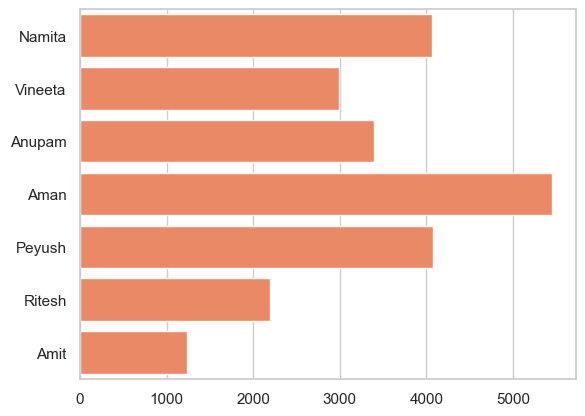

In [269]:
sns.barplot(x=list(shark_totals.values()), y=list(shark_totals.keys()), color="coral")

In [270]:
founder_success = df.groupby('Number of Presenters')['Funded'].mean().sort_index()

In [271]:
df['Gender Combo'] = df['Male Presenters'].astype(str) + "M_" + df['Female Presenters'].astype(str) + "F"
gender_success = df.groupby('Gender Combo')['Funded'].mean().sort_values(ascending=False).head(10)

<Axes: xlabel='Number of Sharks in Deal', ylabel='Total Deal Amount'>

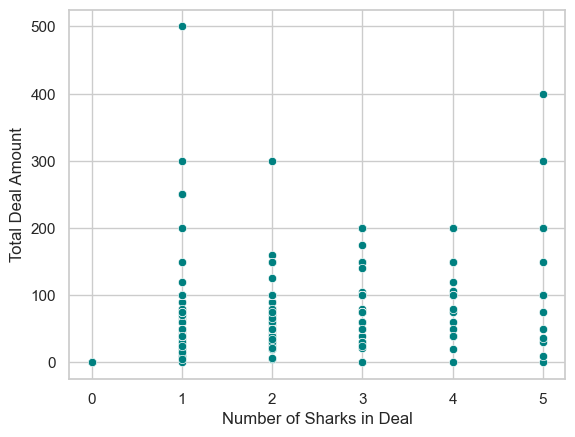

In [272]:
sns.scatterplot(x='Number of Sharks in Deal', y='Total Deal Amount', data=df, color="teal")

In [273]:
df.to_csv("tank", index=False)

In [274]:
print(f"Top Funded Industry: {industry_funding.index[0]} with ₹{industry_funding.values[0]:,.2f}")

Top Funded Industry: Beauty/Fashion with ₹5,938.00
